# HW 3--pandas

## Exercise #1 (10 points) 

After you develop your code to play Addition War and perform descriptive analysis using NumPy functionality (as in Homework #2), you realize that it's a bit inefficient to store all of the results in separate arrays. Let's utilize pandas to store and analyze the results of our simulated gameplay.

a. (4 points) Before doing so, let's begin with some updates to your play function (corrected, or taken from the Homework #2 solutions, once provided; you will also need to make use of your deal function, but no changes will be needed):

(1 point) Add the capability to track the number of ties for each game. In this total, you should include not only the ties that occur at the beginning of a round, but any additional ties that occur during a tie breaker.
(1 point) Add the capability to track the largest total won during a round in a given game, which could occur in a standard round (with no ties) or a tiebreaker round (with one or more ties). You do not need to distinguish whether the total was won in a standard or tiebreaker round.
(1 point) Add the capability to play multiple games within the function, using a new argument games (equals 1 by default). The function should track the following statistics for each game, stored in a dictionary (ideally as separate entries, which will facilitate next steps):
Initial totals (i.e., sum of card values for initially dealt hands) for player 1 and player 2, respectively
Number of ties during gameplay
Maximum round total won (i.e., maximum sum of card values won during a round, potentially including tiebreakers)
Final totals (i.e., sum of card values after completing gameplay) for player 1 and player 2, respectively
Note that you do not need to explicitly track the outcome of the game (i.e., who wins or loses, or whether there was a tie). This will be determined at a later step.

Demonstrate the performance of your function for 1-game (games = 1) and 5-game samples (games = 5), and display the resultant dictionaries for each case (1 point).


In [1]:
import numpy as np
import pandas as pd

In [2]:
L = np.array([range(1,14)])
deck = np.concatenate([L, L], axis=0)
deck = np.concatenate([deck, deck], axis=0)
print(deck)
print('Total value: ', sum(sum(deck)))

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13]]
Total value:  364


In [3]:
# redesign the function play() in HW2
def play(n=1):  # Add the capability to play multiple games within the function, using a new argument games
    """This function will simulate n times (n =20) the game and return the values including: initial scores of 
    each player(player1_initial, player2_initial), final scores of each player(total_p1, total_p2) and whether 
    player 1 or player 2 win the game(p1_win and p2_win, 1 represents win, 0 represents loss)"""
    my_dict = {}
    for i in range(0,n):     ## fairly same as play() function
        flat_deck = deck.flatten()                       
        np.random.shuffle(flat_deck)                      
        player_1 = flat_deck[0:26]                           
        player_2 = flat_deck[26:]
        player1_initial = sum(player_1)
        player2_initial = sum(player_2)
        total_p1 = []                         ## Add the capability to track the largest total won
        total_p2 = []                         ## Add the capability to track the largest total won
        tie = []                              ## Add the capability to track the number of ties
        p1_win = 0
        p2_win = 0
        for i in range(1,14):
            if sum(player_1[(i*2)-2:(i*2)]) > sum(player_2[(i*2)-2:(i*2)]):    ## player 1 wins
                tie.append(0)
                score_p1 = sum(player_1[(i*2)-2:(i*2)]) + sum(player_2[(i*2)-2:(i*2)]) + tie[(i-2)]
                score_p2 = 0
                total_p1.append(score_p1)  
                total_p2.append(score_p2)
            elif sum(player_1[(i*2)-2:(i*2)]) < sum(player_2[(i*2)-2:(i*2)]):  ## player 2 wins
                tie.append(0)
                score_p1 = 0
                score_p2 = sum(player_1[(i*2)-2:(i*2)]) + sum(player_2[(i*2)-2:(i*2)]) + tie[(i-2)]
                total_p1.append(score_p1)  
                total_p2.append(score_p2)
            else:               ## if tie happens
                if i == 1:      ### if happens in first round: there is no accumulative tie score
                    tie.append(sum(player_1[(i*2)-2:(i*2)]) + sum(player_2[(i*2)-2:(i*2)]))
                    total_p1.append(0)  
                    total_p2.append(0)
                elif i == 13:   ### if happens in last round: I should split tie score evenly for two players
                    score_p1 = sum(player_1[(i*2)-2:(i*2)]) + (tie[(i-2)])/2
                    score_p2 = sum(player_2[(i*2)-2:(i*2)]) + (tie[(i-2)])/2
                    total_p1.append(score_p1)  
                    total_p2.append(score_p2)
                else:           ### if happens in between, a consecutive tie might happen, so I calculate accumulative tie score
                    tie.append(sum(player_1[(i*2)-2:(i*2)]) + sum(player_2[(i*2)-2:(i*2)]) + tie[i-2])
                    total_p1.append(0)  
                    total_p2.append(0)
        # summrize who wins each game
        if sum(total_p2)>sum(total_p1):    ## if player 2 wins
            p2_win += 1
            p1_win += 0
        elif sum(total_p2)<sum(total_p1):  ## if player 1 wins
            p1_win += 1
            p2_win += 0
        else:                              ## if tie
            p1_win += 0
            p2_win += 0
        # track the following statistics for each game, stored in a dictionary
        my_dict.setdefault('Player 1 initial total',[]).append(player1_initial)
        my_dict.setdefault('Player 2 initial total',[]).append(player2_initial)
        my_dict.setdefault('Number of tie', []).append(np.count_nonzero(tie))
        my_dict.setdefault('Max round total', []).append(max(max(total_p1), max(total_p2)))
        my_dict.setdefault('Player 1 final total',[]).append(sum(total_p1))
        my_dict.setdefault('Player 2 final total',[]).append(sum(total_p2))
    return my_dict

In [4]:
# function for 1-game
result_1 = play(1)
print(result_1)

{'Player 1 initial total': [181], 'Player 2 initial total': [183], 'Number of tie': [0], 'Max round total': [41], 'Player 1 final total': [132], 'Player 2 final total': [232]}


In [5]:
# function for 5-game
result_5 = play(5)
print(result_5)

{'Player 1 initial total': [170, 181, 184, 183, 194], 'Player 2 initial total': [194, 183, 180, 181, 170], 'Number of tie': [0, 1, 0, 1, 1], 'Max round total': [42, 64, 46, 49, 60], 'Player 1 final total': [121, 167, 164, 178, 253], 'Player 2 final total': [243, 197, 200, 186, 111]}


b. (1 point) Simulate 1000 games and store your results in a pandas DataFrame. Preview the first and last 10 rows of your results as proof of a successful run.

In [6]:
# simulate 1000 games
result_1000 = play(1000)
# store your results in a pandas DataFrame
df = pd.DataFrame(result_1000)
# preview the first 10 rows
df.head(10)

,Player 1 initial total,Player 2 initial total,Number of tie,Max round total,Player 1 final total,Player 2 final total
0,185,179,1,52,223.0,141.0
1,187,177,0,38,288.0,76.0
2,188,176,0,40,136.0,228.0
3,170,194,1,59,158.0,206.0
4,182,182,1,68,198.0,166.0
5,187,177,0,45,171.0,193.0
6,177,187,0,33,227.0,137.0
7,189,175,0,47,174.0,190.0
8,167,197,1,57,122.0,242.0
9,184,180,0,37,174.0,190.0


In [7]:
# preview the last 10 rows
df.tail(10)

,Player 1 initial total,Player 2 initial total,Number of tie,Max round total,Player 1 final total,Player 2 final total
990,193,171,0,43,251.0,113.0
991,156,208,2,58,121.0,243.0
992,175,189,0,36,154.0,210.0
993,183,181,1,59,233.0,131.0
994,179,185,0,41,197.0,167.0
995,176,188,0,44,127.0,237.0
996,183,181,2,54,147.0,217.0
997,174,190,2,67,153.0,211.0
998,169,195,0,41,133.0,231.0
999,197,167,0,40,250.0,114.0


c. (3 points) Given your DataFrame of simulated game results, let's determine the outcome of each game, based on the final player totals. Add a new column to your DataFrame ('outcome') that contains the value 'Player 1 wins' if Player 1's final total is higher, 'Player 2 wins' if Player 2's final total is higher, or 'Tie game' if the two player's final totals are equal. In addition, add new columns for the winning total ('winning_total') and losing total ('losing_total'), which contain the final totals for the winning and losing players, respectively, and missing values (NumPy.nan) for tie games. (2 points)

Preview the first 10 rows of your modified DataFrame. Then, summarize the frequency of the three outcomes and display the rows in your DataFrame that contain the 'Tie game' outcomes. Finally, produce descriptive statistics (e.g., minimum, mean, standard deviation, maximum) for your winning total column, and display the rows in your DataFrame that contain the top 10 winning totals. (1 point)

In [8]:
# add new columns: 'outcome', 'winning_total', 'losing_total'
df['outcome'] = np.nan
df['winning_total'] = np.nan              ## will print NaN for tie game
df['losing_total'] = np.nan              ## will print NaN for tie game
# fill values for 3 new columns
for i in range(0,1000):
    if df.iloc[i,4] > df.iloc[i,5]:
        df.iloc[i,6] = 'Player 1 wins'    ## 'Player 1 wins' if Player 1's final total is higher, 
        df.iloc[i,7] = df.iloc[i,4]       ## add player 1 final total to 'winning_total'
        df.iloc[i,8] = df.iloc[i,5]       ## add player 2 final total to 'lossing_total'
    elif df.iloc[i,4] < df.iloc[i,5]:
        df.iloc[i,6] = 'Player 2 wins'    ## 'Player 2 wins' if Player 2's final total is higher
        df.iloc[i,7] = df.iloc[i,5]       ## add player 2 final total to 'winning_total'
        df.iloc[i,8] = df.iloc[i,4]       ## add player 1 final total to 'lossing_total'
    else: 
        df.iloc[i,6] = 'Tie game'         ## 'Tie game'

# preview the first 10 rows
df.head(10)

,Player 1 initial total,Player 2 initial total,Number of tie,Max round total,Player 1 final total,Player 2 final total,outcome,winning_total,losing_total
0,185,179,1,52,223.0,141.0,Player 1 wins,223.0,141.0
1,187,177,0,38,288.0,76.0,Player 1 wins,288.0,76.0
2,188,176,0,40,136.0,228.0,Player 2 wins,228.0,136.0
3,170,194,1,59,158.0,206.0,Player 2 wins,206.0,158.0
4,182,182,1,68,198.0,166.0,Player 1 wins,198.0,166.0
5,187,177,0,45,171.0,193.0,Player 2 wins,193.0,171.0
6,177,187,0,33,227.0,137.0,Player 1 wins,227.0,137.0
7,189,175,0,47,174.0,190.0,Player 2 wins,190.0,174.0
8,167,197,1,57,122.0,242.0,Player 2 wins,242.0,122.0
9,184,180,0,37,174.0,190.0,Player 2 wins,190.0,174.0


In [9]:
# summarize the frequency of the three outcomes
df['outcome'].value_counts()

Player 2 wins    507
Player 1 wins    484
Tie game           9
Name: outcome, dtype: int64

In [10]:
# display the rows in your DataFrame that contain the 'Tie game' outcomes
df[df['outcome'] =='Tie game']

,Player 1 initial total,Player 2 initial total,Number of tie,Max round total,Player 1 final total,Player 2 final total,outcome,winning_total,losing_total
113,196,168,0,36,182.0,182.0,Tie game,NaN,NaN
197,185,179,1,56,182.0,182.0,Tie game,NaN,NaN
324,191,173,0,36,182.0,182.0,Tie game,NaN,NaN
415,186,178,0,40,182.0,182.0,Tie game,NaN,NaN
463,183,181,0,39,182.0,182.0,Tie game,NaN,NaN
578,181,183,0,36,182.0,182.0,Tie game,NaN,NaN
595,168,196,0,40,182.0,182.0,Tie game,NaN,NaN
613,182,182,0,36,182.0,182.0,Tie game,NaN,NaN
642,181,183,1,55,182.0,182.0,Tie game,NaN,NaN


In [11]:
# produce descriptive statistics (e.g., minimum, mean, standard deviation, maximum) for your winning total column
print('Min winning total: ', df['winning_total'].min())
print('Max winning total: ', df['winning_total'].max())
print('Mean winning total: ', df['winning_total'].mean())
print('Standard deviation of winning total: ', df['winning_total'].std())

Min winning total:  183.0
Max winning total:  364.0
Mean winning total:  223.16448032290614
Standard deviation of winning total:  30.901181529294806


In [12]:
# display the rows in your DataFrame that contain the top 10 winning totals
df.sort_values(by='winning_total', ascending=False).head(10)

,Player 1 initial total,Player 2 initial total,Number of tie,Max round total,Player 1 final total,Player 2 final total,outcome,winning_total,losing_total
235,156,208,3,66,0.0,364.0,Player 2 wins,364.0,0.0
503,145,219,0,42,27.0,337.0,Player 2 wins,337.0,27.0
116,164,200,3,77,28.0,336.0,Player 2 wins,336.0,28.0
909,147,217,2,63,29.0,335.0,Player 2 wins,335.0,29.0
208,229,135,1,48,332.0,32.0,Player 1 wins,332.0,32.0
616,213,151,0,40,326.0,38.0,Player 1 wins,326.0,38.0
643,217,147,0,37,321.0,43.0,Player 1 wins,321.0,43.0
360,156,208,2,66,47.0,317.0,Player 2 wins,317.0,47.0
310,202,162,1,54,317.0,47.0,Player 1 wins,317.0,47.0
28,135,229,0,36,48.0,316.0,Player 2 wins,316.0,48.0


d. (2 points) Given your DataFrame of simulated game results, calculate the frequency of the number of ties within each game (i.e., the number of rounds in which a tie occurs). Then, calculate the mean maximum round total as a function of the number of ties. What do you observe about the relationship between the number of ties and the mean maximum round total?

In [13]:
# calculate the frequency of the number of ties within each game
df['Number of tie'].value_counts()

0    534
1    337
2    107
3     21
4      1
Name: Number of tie, dtype: int64

0 40.36516853932584
1 56.85756676557863
2 65.61682242990655
3 73.52380952380952
4 67.0


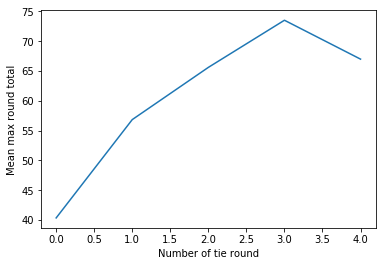

In [15]:
# calculate the mean maximum round total as a function of the number of ties
x = list(range(df['Number of tie'].max()+1))
y = []
for n in range(df['Number of tie'].max()+1):
    mean_max_round = df[df['Number of tie']==n]['Max round total'].mean()
    y.append(mean_max_round)
    print(n, mean_max_round)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('Number of tie round')
plt.ylabel('Mean max round total')
plt.show()

What I found from the relationship is that for most of the time, the higher the number of tie round in one game, the higher the mean max round total. I made a symple line chart to indicate the relationship. However sometimes, the mean for higher number of tie may get lower mean max round total. It could be explain by its tie rounds are not contineous for example, total a 4-tie-round game actually includes two 2-tie rounds.